In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Playground is a good measure of overall livability. Because people can bring this place to relax at any time, and they can also bring children to play. At the same time, the facilities and quantity of the playground can also reflect the economic situation and entertainment methods of the neighborhoods. If there are far more playgrounds in one community than another, it can indicate that the society is more concerned about people's entertainment and life.

This database contains playgrounds in all neighborhoods in Pittsburgh and can show me various attributes of playgrounds. We first remove all playgrounds that contain null, because no matter which piece of information is missing (especially fire zone, police zone, safe surface type), the playground will look unsafe. After this, we remove some columns that are not relevant to the best community.

In [315]:
pe = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
pe = pe.dropna()
pdd = pe.drop(columns=['name', 'id','street',"street_number","tract","public_works_division","fire_zone","police_zone","pli_division","manufacturer","council_district","latitude","longitude","safety_surface_type","equipment_type"])
pdd.head()

,ada_accessible,neighborhood,ward
0,f,Beechview,19
1,f,Allegheny Center,22
2,f,Squirrel Hill South,14
5,f,Windgap,28
6,t,Windgap,28


A simple huge database can't reflect anything. We now find the 10 societies with the most playgrounds.

In [316]:
count = pdd['neighborhood'].value_counts()
count = count.to_frame()
count.head(10)

,neighborhood
Allegheny Center,13
Mount Washington,10
South Side Slopes,10
Beltzhoover,9
Elliott,9
Beechview,9
Sheraden,9
Squirrel Hill South,9
Regent Square,8
Bloomfield,7


In [317]:
best_n = [
    {"Neighborhood":"Squirrel Hill South", "playground number": 32},
    {"Neighborhood":"East Liberty", "playground number": 26},
    {"Neighborhood":"Beechview", "playground number":21 },
    {"Neighborhood":"Allegheny Center", "playground number":15},
    {"Neighborhood":"South Side Slopes", "playground number":14 },
    {"Neighborhood":"Hazelwood", "playground number":13 },
    {"Neighborhood":"Sheraden", "playground number":13 },
    {"Neighborhood":"Elliott", "playground number":11 },
    {"Neighborhood":"Beltzhoover", "playground number":10  },
    {"Neighborhood":"Highland Park", "playground number":10 },
]
# create a DataFrame from a list of dictionaries
w = pd.DataFrame(best_n)

Next, we use plot to better observe the number of 10 playgrounds.

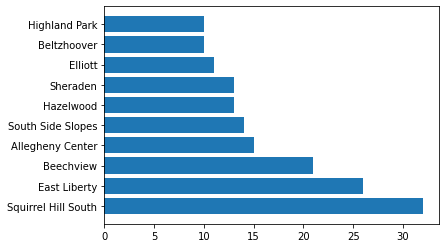

In [318]:
x = w["Neighborhood"]
y = w["playground number"]
plt.barh(x, y)
plt.show()

We cannot judge the best neighborhoods based on the number of playgrounds alone. We should consider the number of ward in each playground. Such data can better reflect the overall situation.

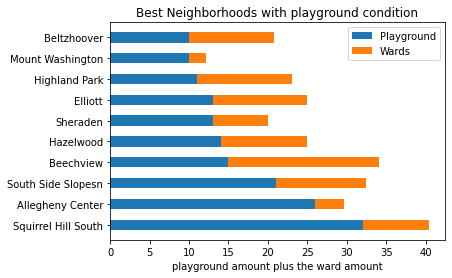

In [319]:
query_mask = pdd['neighborhood'] == "Squirrel Hill South"
chicken_bowls = pdd[query_mask]
n1 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "East Liberty"
chicken_bowls = pdd[query_mask]
n2 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Beechview"
chicken_bowls = pdd[query_mask]
n3 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Allegheny Center"
chicken_bowls = pdd[query_mask]
n4 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "South Side Slopes"
chicken_bowls = pdd[query_mask]
n5 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Sheraden"
chicken_bowls = pdd[query_mask]
n7 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Elliott"
chicken_bowls = pdd[query_mask]
n8 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Highland Park"
chicken_bowls = pdd[query_mask]
n9 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Hazelwood"
chicken_bowls = pdd[query_mask]
n6 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Beltzhoover"
chicken_bowls = pdd[query_mask]
n10 = sum(chicken_bowls['ward'])/15
labels = ['Squirrel Hill South', 'Allegheny Center', 'South Side Slopesn', 'Beechview', "Hazelwood","Sheraden","Elliott","Highland Park","Mount Washington","Beltzhoover"] 
   
mine = [32, 26, 21, 15,14,13,13,11,10,10] 
others = [n1, n2, n3, n4,n5,n6,n7,n8,n9,n10]  
width = 0.5
fig, ax = plt.subplots() 
ax.barh(labels, mine, width,   
        label ='Playground') 
ax.barh(labels, others, width,  
        left = mine,  
        label ='Wards') 
ax.set_xlabel('playground amount plus the ward amount') 
ax.legend() 
ax.set_title('Best Neighborhoods with playground condition') 
plt.show()

In [320]:
score = [
    {"Neighborhood":"Squirrel Hill South", "score": 10},
    {"Neighborhood":"East Liberty", "score": 9},
    {"Neighborhood":"Beechview", "score":8 },
    {"Neighborhood":"Allegheny Center", "score":7},
    {"Neighborhood":"South Side Slopes", "score":6 },
    {"Neighborhood":"Hazelwood", "score":5 },
    {"Neighborhood":"Sheraden", "score":4 },
    {"Neighborhood":"Elliott", "score":3 },
    {"Neighborhood":"Beltzhoover", "score":2  },
    {"Neighborhood":"Highland Park", "score":1 },
]
best = pd.DataFrame(score)

In [321]:
best

,Neighborhood,score
0,Squirrel Hill South,10
1,East Liberty,9
2,Beechview,8
3,Allegheny Center,7
4,South Side Slopes,6
5,Hazelwood,5
6,Sheraden,4
7,Elliott,3
8,Beltzhoover,2
9,Highland Park,1
